In [1]:
import numpy as np
import pandas as pd
test= pd.read_csv("q_dataset/ds_test.csv",index_col=0)
train= pd.read_csv("q_dataset/ds_train.csv",index_col=0)
whole= pd.read_csv("q_dataset/ds_whole.csv",index_col=0)
features_te=test.drop(columns=['glaucoma'])
target_te=test.glaucoma
features_tr=train.drop(columns=['glaucoma'])
target_tr=train.glaucoma
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
features_te1= transfer.fit_transform(features_te)
features_tr1= transfer.fit_transform(features_tr)

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
tree_clf = DecisionTreeClassifier()

In [4]:
tree_clf.fit(features_tr1, target_tr)

DecisionTreeClassifier()

In [5]:
test_predict = tree_clf.predict(features_te1)
test_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [6]:
tree_clf.score(features_te1,target_te)

0.93

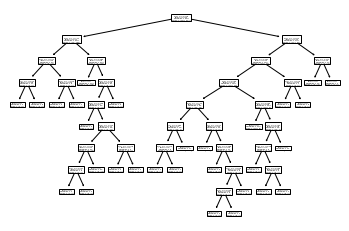

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(tree_clf) 
plt.show()

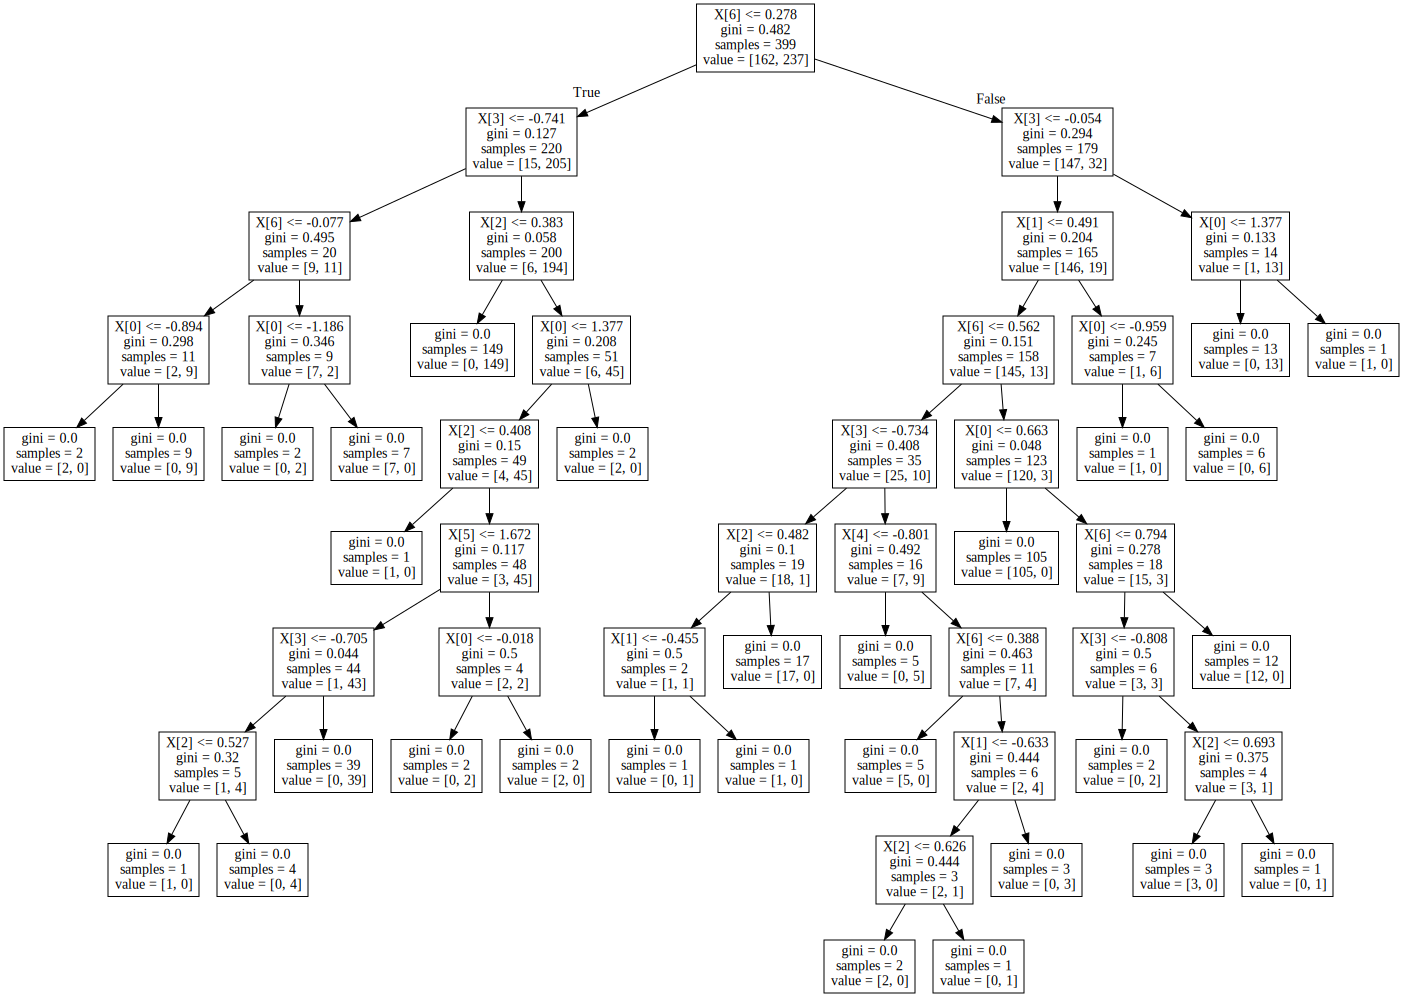

In [8]:
from sklearn.tree import export_graphviz
import graphviz 
dot_data = export_graphviz(tree_clf)
graph = graphviz.Source(dot_data)  
graph

In [9]:
dot_data = export_graphviz(tree_clf, out_file="output/q_tree_clf.dot")

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [11]:
accuracy_score(target_te,test_predict)

0.93

In [12]:
confusion_matrix(target_te,test_predict)

array([[36,  4],
       [ 3, 57]], dtype=int64)

In [13]:
import seaborn as sns

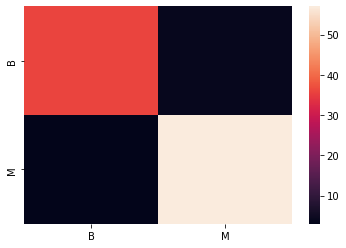

In [14]:
sns.heatmap(confusion_matrix(target_te,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])
plt.show()

In [15]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

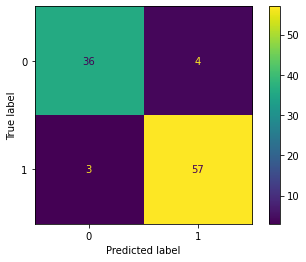

In [16]:
plot_confusion_matrix(tree_clf, features_te1, target_te)
plt.show()

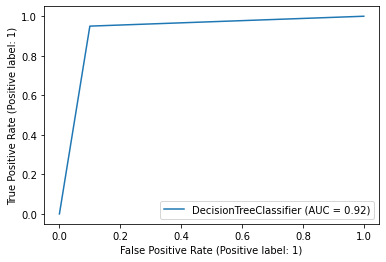

In [17]:
plot_roc_curve(tree_clf,features_te1,target_te)
plt.show()

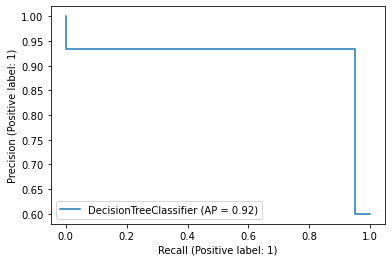

In [18]:
plot_precision_recall_curve(tree_clf,features_te1, target_te)
plt.show()